In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('datalr.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,680000
4,4000,5.0,8,725000


Text(0, 0.5, 'price(USD)')

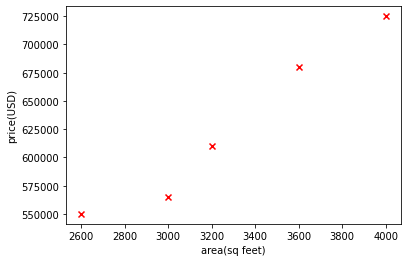

In [3]:
%matplotlib inline
plt.scatter(df.area, df.price, color = 'red', marker = 'x')
plt.xlabel('area(sq feet)')
plt.ylabel('price(USD)')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [5]:
reg.predict([[3300]])

array([628715.75342466])

In [6]:
reg.coef_

array([135.78767123])

In [7]:
reg.intercept_

180616.43835616432

In [8]:
# y=m*x+c
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

In [9]:
d = pd.read_csv('area.csv')
d.head(3)

,area
0,2600
1,3000
2,3200


In [10]:
reg.predict(d)

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [11]:
d['prices'] = reg.predict(d)

In [12]:
d.to_csv('prediction.csv', index = False)

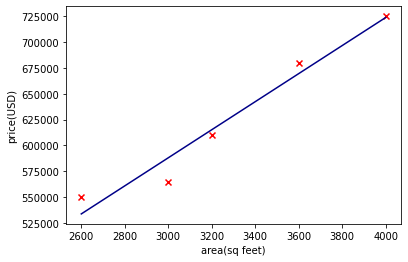

In [13]:
%matplotlib inline
plt.scatter(df.area, df.price, color = 'red', marker = 'x')
plt.xlabel('area(sq feet)')
plt.ylabel('price(USD)')
plt.plot(df['area'], reg.predict(df[['area']]), color = '#000088')

In [14]:
reg.predict(df[['area']])

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [15]:
df.area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [16]:
import pickle

In [17]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg,f)

In [18]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [20]:
mp.predict([[3300]])

array([628715.75342466])

In [23]:
import joblib

In [24]:
joblib.dump(reg,'joblib_model')

['joblib_model']

In [25]:
with open('joblib_model', 'rb') as jf:
    mj = joblib.load(jf)

In [26]:
mj.predict([[3300]])

array([628715.75342466])